# Import all packeages 

In [1]:
import numpy as np
import keras

from keras import backend as K
from keras.models import Sequential,load_model
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
#from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Create files path for 'train', 'test', 'valid' dataset


In [2]:
train_path = 'hand/train'
test_path = 'hand/test'
valid_path = 'hand/valid'

# Load all pictures

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['0','1','2','3'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size= (224,224),classes=['0','1','2','3'],batch_size=5)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['0','1','2','3'],batch_size=10)

Found 320 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


# Show some sample pictures

### Define 'plots' function to show pictures

In [4]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 ==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

In [5]:
imgs, labels =next(train_batches)

C:\Anaconda3\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


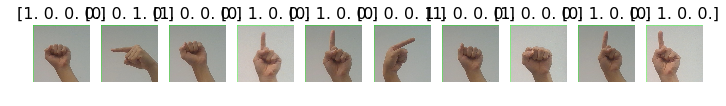

In [6]:
plots(imgs,titles=labels)

# Load VGG16 pretrained model from Keras

In [7]:
vgg16_model = keras.applications.vgg16.VGG16(include_top=True,weights='imagenet')
# automatically download vgg16 model from the website below, which is about 500 MB
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5

### VGG16 model structure

In [8]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
#type(vgg16_model) # the type of the model

### Change model type from 'model' to 'Sequential'

In [10]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [11]:
#model.summary()

In [12]:
for layer in model.layers:
   layer.trainable = False

### Add 'softmax' layer

In [13]:
model.add(Dense(4,input_shape=(5,),activation='softmax')) #total 4 classes

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Start to train our customized model

In [15]:
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit_generator(train_batches, steps_per_epoch=8,
                    validation_data=valid_batches,validation_steps=2,epochs=3,verbose=2)

Epoch 1/3
 - 99s - loss: 1.2002 - acc: 0.4875 - val_loss: 0.2822 - val_acc: 0.9500
Epoch 2/3
 - 91s - loss: 0.1133 - acc: 1.0000 - val_loss: 0.1365 - val_acc: 1.0000
Epoch 3/3
 - 92s - loss: 0.1161 - acc: 0.9625 - val_loss: 0.0334 - val_acc: 1.0000


# Predict result using 'test' pictures

C:\Anaconda3\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


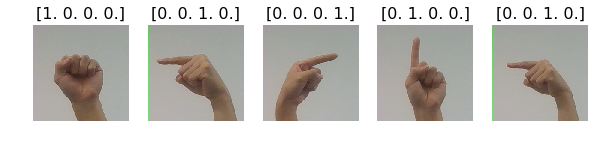

In [17]:
test_imgs,test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [18]:
predictions = model.predict_generator(test_batches,steps=2,verbose=0)


In [19]:
predictions

array([[9.99164701e-01, 2.64759961e-04, 1.30995206e-04, 4.39500349e-04],
       [5.14196185e-03, 1.41466607e-03, 9.34375882e-01, 5.90675063e-02],
       [1.06736974e-04, 1.31072593e-03, 7.47247785e-03, 9.91110086e-01],
       [2.95240735e-03, 9.91797328e-01, 7.00506207e-05, 5.18034678e-03],
       [3.82491387e-03, 2.73064268e-03, 9.57364559e-01, 3.60799693e-02],
       [9.95067596e-01, 2.62630801e-03, 1.82883965e-03, 4.77276073e-04],
       [9.99394059e-01, 3.13084049e-04, 8.87894857e-05, 2.04054726e-04],
       [2.13976279e-02, 9.16719437e-01, 8.82189546e-04, 6.10007122e-02],
       [2.24510120e-04, 1.71474135e-03, 5.90574257e-02, 9.39003348e-01],
       [2.05149013e-03, 1.63471641e-03, 9.57944095e-01, 3.83697338e-02]],
      dtype=float32)

In [20]:
model.save('model.h5')